# Preliminary Libraries

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Dataset

In [2]:
DATA_SIZE = 500

with open('dataset.csv', 'w', newline='', encoding="utf-8") as file:
    data = csv.writer(file)
    
    # Columns
    data.writerow(["percentage", "returns"])

    for i in range(DATA_SIZE):
        perc = np.random.uniform(0.00, 1.00)
        data.writerow([perc, "🔵" * int(perc * 10) + "⚪" * int(10 - perc * 10)])


In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset['returns'].value_counts()

🔵⚪⚪⚪⚪⚪⚪⚪⚪    56
🔵🔵🔵🔵🔵🔵🔵🔵🔵    54
🔵🔵🔵⚪⚪⚪⚪⚪⚪    53
🔵🔵🔵🔵🔵🔵🔵⚪⚪    52
🔵🔵🔵🔵🔵⚪⚪⚪⚪    51
🔵🔵🔵🔵⚪⚪⚪⚪⚪    51
🔵🔵⚪⚪⚪⚪⚪⚪⚪    50
🔵🔵🔵🔵🔵🔵⚪⚪⚪    47
🔵🔵🔵🔵🔵🔵🔵🔵⚪    46
⚪⚪⚪⚪⚪⚪⚪⚪⚪    40
Name: returns, dtype: int64

# Decision Tree Classifier

In [5]:
X = dataset.drop('returns', axis=1).values
y = dataset['returns'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
model = DecisionTreeClassifier();
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5384615384615384, 0.9285714285714286, 'percentage <= 0.9\ngini = 0.898\nsamples = 350\nvalue = [23, 40, 33, 39, 43, 36, 35, 33, 30, 38]'),
 Text(0.46153846153846156, 0.7857142857142857, 'percentage <= 0.402\ngini = 0.886\nsamples = 312\nvalue = [23, 40, 33, 39, 43, 36, 35, 33, 30, 0]'),
 Text(0.3076923076923077, 0.6428571428571429, 'percentage <= 0.298\ngini = 0.74\nsamples = 135\nvalue = [23, 40, 33, 39, 0, 0, 0, 0, 0, 0]'),
 Text(0.23076923076923078, 0.5, 'percentage <= 0.2\ngini = 0.651\nsamples = 96\nvalue = [23, 40, 33, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.15384615384615385, 0.35714285714285715, 'percentage <= 0.102\ngini = 0.464\nsamples = 63\nvalue = [23, 40, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.07692307692307693, 0.21428571428571427, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.23076923076923078, 0.21428571428571427, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\

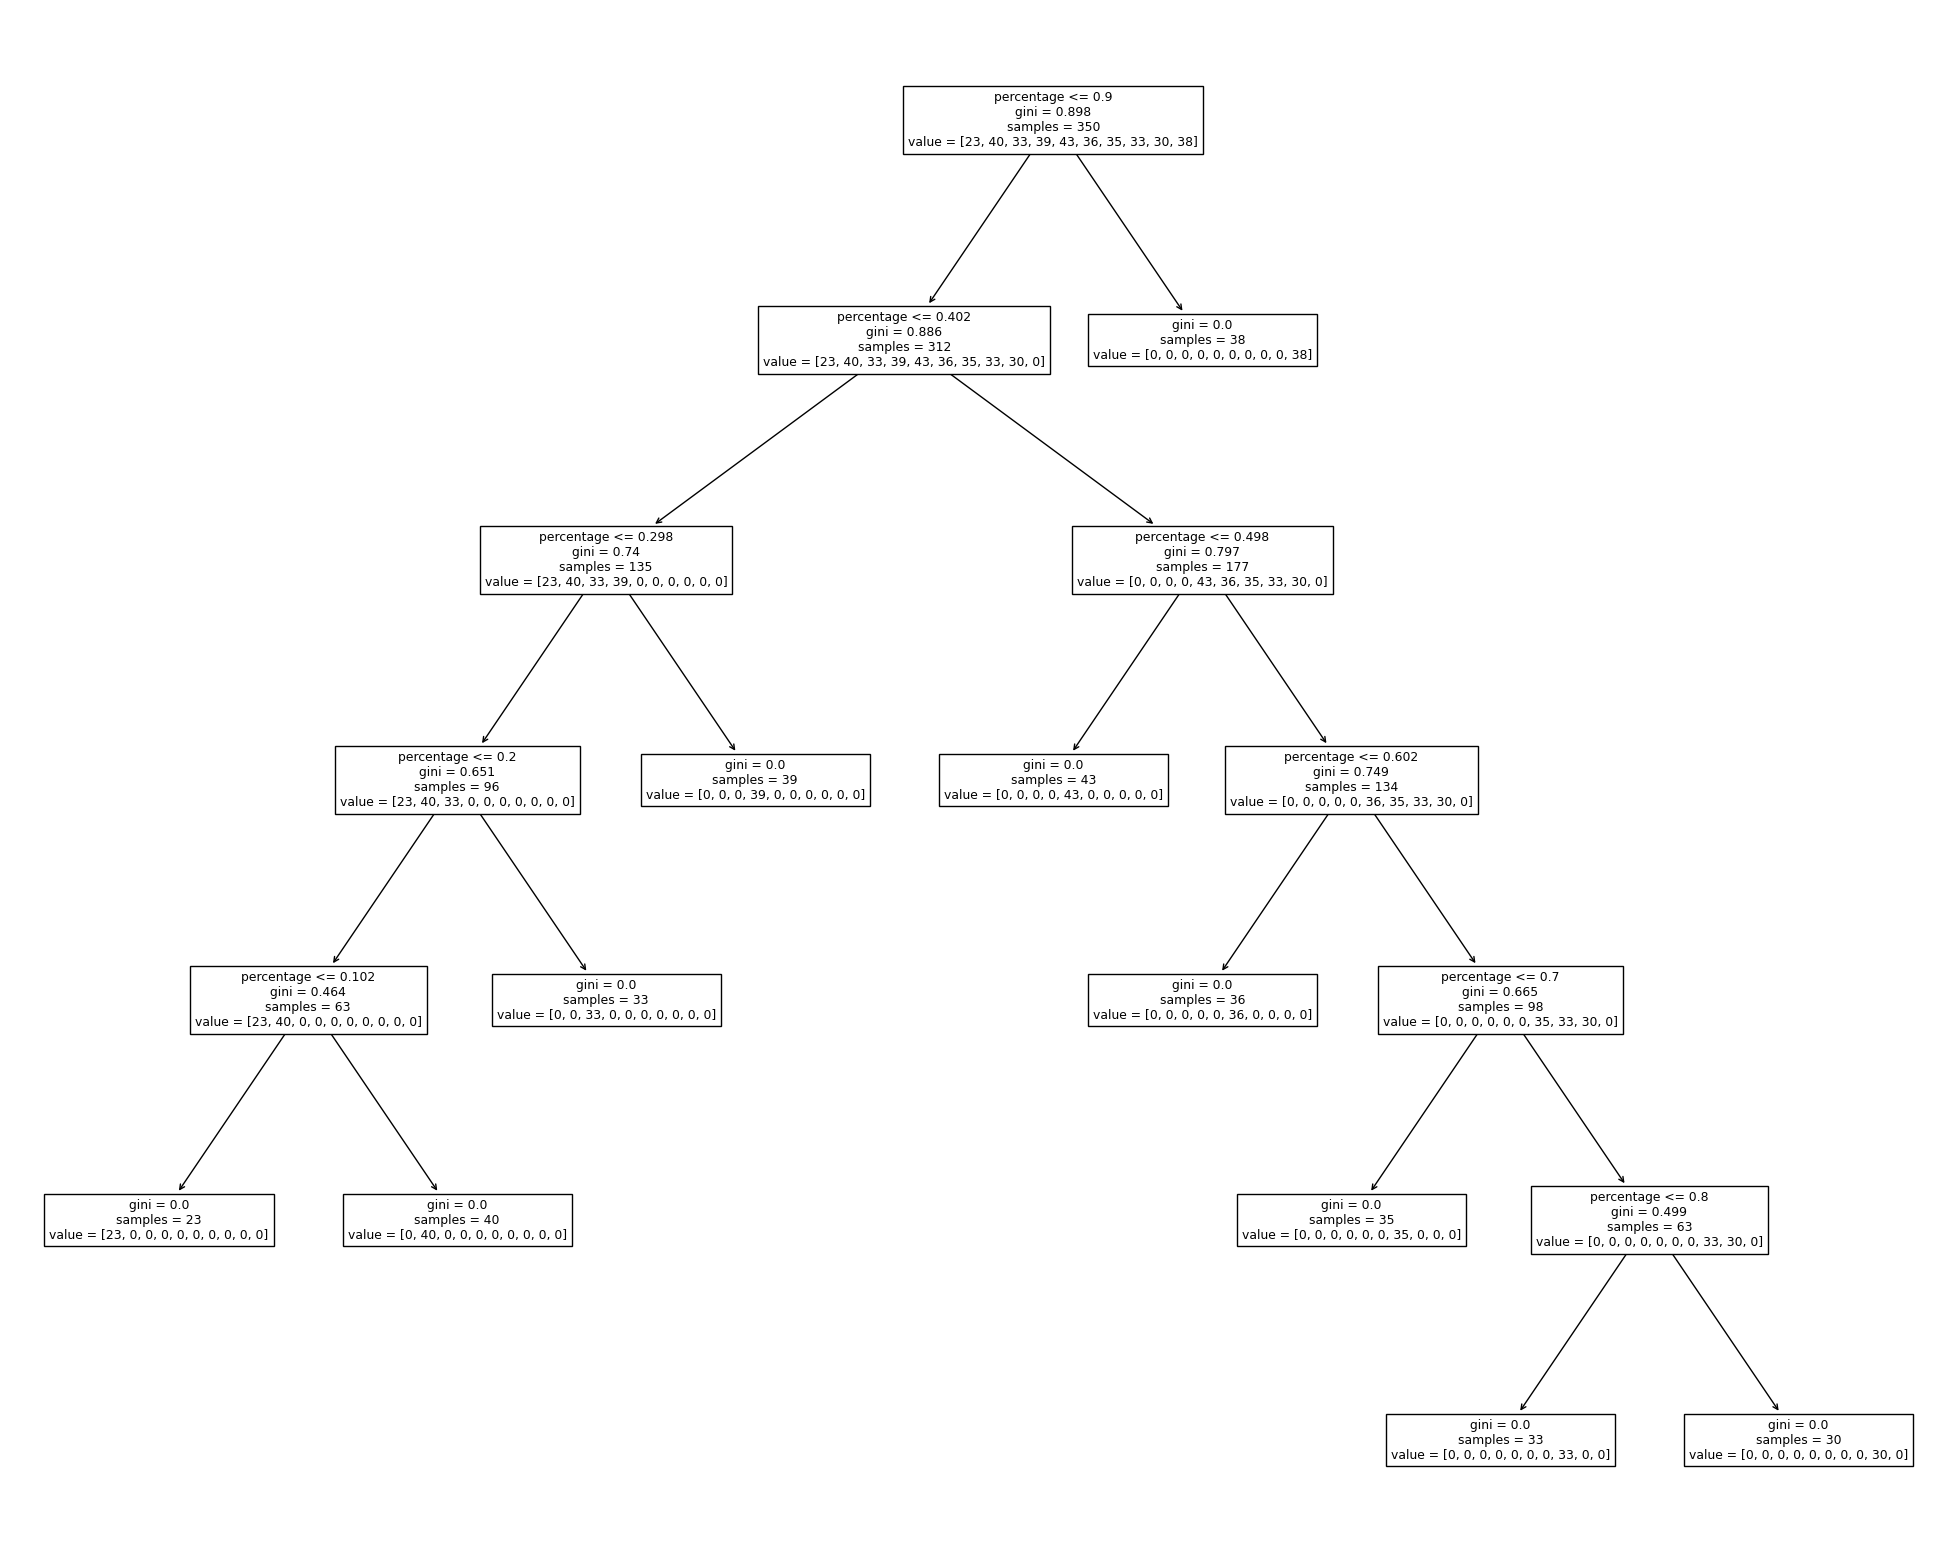

In [7]:
fig = plt.figure(figsize=(25, 20))
plot_tree(model, feature_names=dataset.columns)

In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   ⚪⚪⚪⚪⚪⚪⚪⚪⚪       0.94      1.00      0.97        17
   🔵⚪⚪⚪⚪⚪⚪⚪⚪       1.00      0.94      0.97        16
   🔵🔵⚪⚪⚪⚪⚪⚪⚪       1.00      1.00      1.00        17
   🔵🔵🔵⚪⚪⚪⚪⚪⚪       1.00      1.00      1.00        14
   🔵🔵🔵🔵⚪⚪⚪⚪⚪       1.00      1.00      1.00         8
   🔵🔵🔵🔵🔵⚪⚪⚪⚪       1.00      1.00      1.00        15
   🔵🔵🔵🔵🔵🔵⚪⚪⚪       1.00      1.00      1.00        12
   🔵🔵🔵🔵🔵🔵🔵⚪⚪       1.00      1.00      1.00        19
   🔵🔵🔵🔵🔵🔵🔵🔵⚪       1.00      1.00      1.00        16
   🔵🔵🔵🔵🔵🔵🔵🔵🔵       1.00      1.00      1.00        16

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [9]:
model.predict([[0.99]])

array(['🔵🔵🔵🔵🔵🔵🔵🔵🔵'], dtype=object)